#### Teofilus San Prasetya

# Bank Customer Classification: Predicting Term Deposit Subscriptions Using Machine Learning - Deployed with FastAPI

**Bank Marketing Dataset**

**This dataset contains 8237 rows and 16 columns, aimed at predicting whether a client will subscribe to a term deposit. It includes demographic and contact information from a bank's marketing campaign.**

**Model machine learning by performing all necessary data preprocessing steps before classification, train the machine learning models by comparing two algorithms, and select the best algorithm to be saved in pickle format.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pickle

import warnings
warnings.filterwarnings('ignore')


### Preprocessing Data

In [2]:
bank_data_ = pd.read_csv('bank_customer.csv')
bank_data_.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,0,29,technician,single,basic.9y,no,yes,no,cellular,nov,wed,648.0,1,999,0,nonexistent,no
1,1,31,admin.,single,university.degree,no,no,no,cellular,aug,wed,295.0,1,999,0,nonexistent,no
2,2,27,blue-collar,single,basic.9y,no,yes,no,telephone,jul,mon,236.0,2,999,0,nonexistent,no
3,3,30,services,married,unknown,no,no,no,telephone,may,wed,143.0,3,999,0,nonexistent,no
4,4,32,technician,married,university.degree,no,no,no,cellular,aug,thu,155.0,1,999,0,nonexistent,no


In [3]:
bank_data_.drop(['Unnamed: 0'], axis=1, inplace=True)
bank_data_

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,29,technician,single,basic.9y,no,yes,no,cellular,nov,wed,648.0,1,999,0,nonexistent,no
1,31,admin.,single,university.degree,no,no,no,cellular,aug,wed,295.0,1,999,0,nonexistent,no
2,27,blue-collar,single,basic.9y,no,yes,no,telephone,jul,mon,236.0,2,999,0,nonexistent,no
3,30,services,married,unknown,no,no,no,telephone,may,wed,143.0,3,999,0,nonexistent,no
4,32,technician,married,university.degree,no,no,no,cellular,aug,thu,155.0,1,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8232,33,admin.,single,university.degree,no,no,no,telephone,may,tue,147.0,1,999,0,nonexistent,no
8233,39,blue-collar,married,basic.9y,no,no,no,telephone,may,mon,793.0,5,999,0,nonexistent,no
8234,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120.0,2,999,0,nonexistent,no
8235,50,admin.,married,university.degree,no,yes,yes,cellular,nov,fri,189.0,2,999,1,failure,no


**Perform data exploration**

In [4]:
bank_data_.shape

(8237, 16)

In [5]:
bank_data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8237 entries, 0 to 8236
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          8237 non-null   int64  
 1   job          8227 non-null   object 
 2   marital      8237 non-null   object 
 3   education    8237 non-null   object 
 4   default      8237 non-null   object 
 5   housing      8237 non-null   object 
 6   loan         8237 non-null   object 
 7   contact      8237 non-null   object 
 8   month        8237 non-null   object 
 9   day_of_week  8237 non-null   object 
 10  duration     8222 non-null   float64
 11  campaign     8237 non-null   int64  
 12  pdays        8237 non-null   int64  
 13  previous     8237 non-null   int64  
 14  poutcome     8237 non-null   object 
 15  y            8237 non-null   object 
dtypes: float64(1), int64(4), object(11)
memory usage: 1.0+ MB


In [6]:
bank_data_.nunique()

age              73
job              12
marital           4
education         8
default           3
housing           3
loan              3
contact           2
month            10
day_of_week       5
duration       1022
campaign         31
pdays            21
previous          7
poutcome          3
y                 2
dtype: int64

In [7]:
bank_data_.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
bank_data_.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,8237.0,40.000486,10.331078,17.0,32.0,38.0,47.0,98.0
duration,8222.0,260.189370,254.942835,0.0,103.0,183.0,324.0,3284.0
campaign,8237.0,2.555299,2.663180,1.0,1.0,2.0,3.0,43.0
pdays,8237.0,962.352434,187.221927,0.0,999.0,999.0,999.0,999.0
previous,8237.0,0.172393,0.481973,0.0,0.0,0.0,0.0,6.0


This statistic shows that the average age of customers is 40 years, with an age range from 17 to 98 years. The average contact duration is around 260 seconds, with a minimum value of 0 seconds and a maximum of 3284 seconds. The average number of contacts in the current campaign is approximately 2.56 times, with the maximum reaching 43 times. The average days since the last contact is 962 days, with most data showing a value of 999 days. The number of contacts before the current campaign averages around 0.17 times, with most customers having had no prior contact before this campaign.

In [9]:
bank_data_.describe(include = ["object"]).transpose()

,count,unique,top,freq
job,8227,12,admin.,2046
marital,8237,4,married,4943
education,8237,8,university.degree,2456
default,8237,3,no,6533
housing,8237,3,yes,4308
loan,8237,3,no,6890
contact,8237,2,cellular,5253
month,8237,10,may,2754
day_of_week,8237,5,mon,1703
poutcome,8237,3,nonexistent,7087


Most customers have administrative jobs ("admin.") with the highest frequency (2046 out of 8227 valid records). The majority of customers are married (4943 out of 8237), have a university degree ("university.degree") as their highest level of education (2456 out of 8237), and do not have credit issues ("default") with a frequency of 6533. Most also own a house ("housing") and do not take personal loans ("loan"), with frequencies of 4308 and 6890, respectively. The main contact method was through mobile phones ("cellular") with a frequency of 5253 out of a total of 8237 customers. The most frequent contact month was May ("may") with a frequency of 2754, and the most frequent day was Monday ("mon") with a frequency of 1703. The most common campaign result was no previous outcome ("nonexistent") in prior contacts (7087 out of 8237). Finally, most customers did not subscribe ("no") to term deposits, with 7303 out of 8237 customers.

In [10]:
bank_data_.duplicated().sum()

1

In [11]:
# Display duplicated rows
duplicated_rows = bank_data_[bank_data_.duplicated(keep=False)]

# Display the duplicated rows
print(duplicated_rows)

      age         job   marital    education default housing loan   contact  \
255    47  technician  divorced  high.school      no     yes   no  cellular   
2725   47  technician  divorced  high.school      no     yes   no  cellular   

     month day_of_week  duration  campaign  pdays  previous     poutcome   y  
255    jul         thu      43.0         3    999         0  nonexistent  no  
2725   jul         thu      43.0         3    999         0  nonexistent  no  


I dropped this duplicate data because the duplicate entries had the same values or there was redundancy.

In [12]:
bank_data_ = bank_data_.drop_duplicates(keep ='last')
bank_data_.duplicated().sum()

0

### Data Analysis

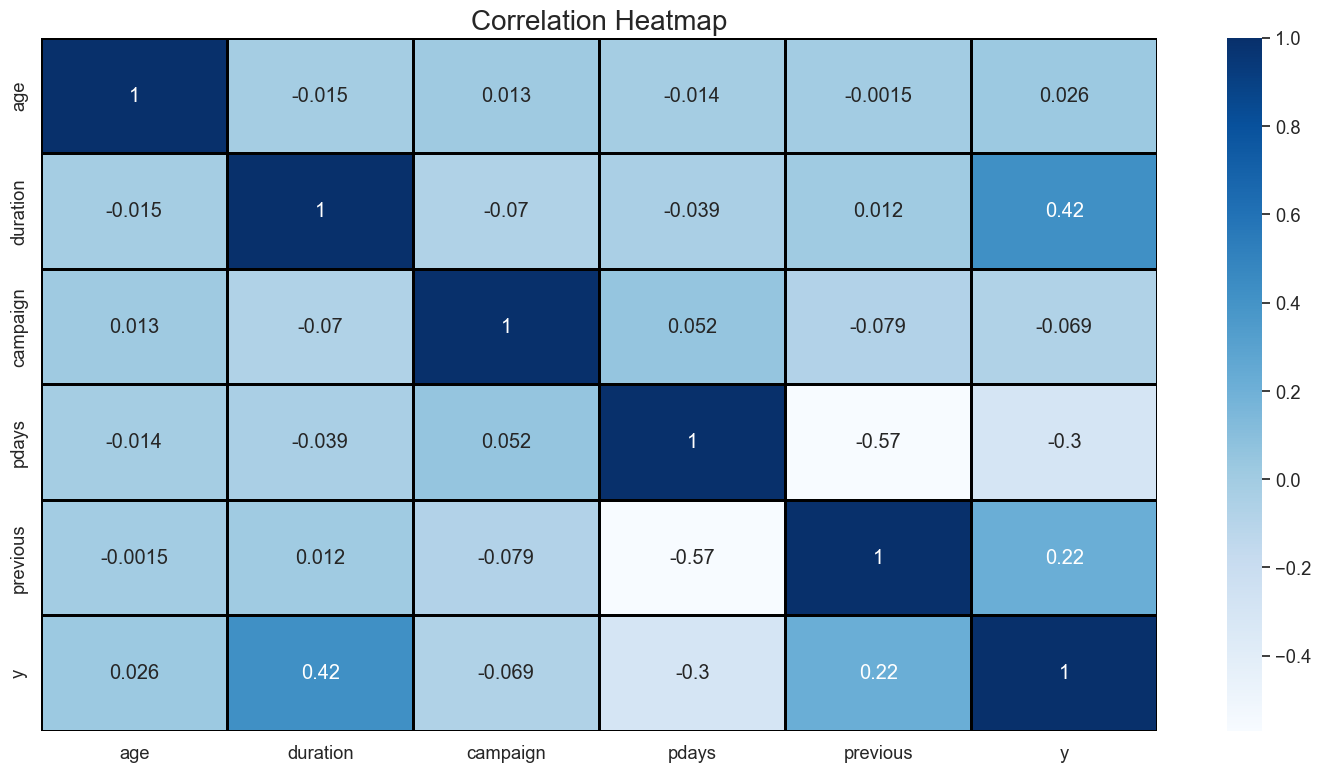

In [13]:
bank_data_.loc[(bank_data_.y == "yes"), "y"] = 1
bank_data_.loc[(bank_data_.y == "no"), "y"] = 0
bank_data_['y'] = bank_data_['y'].astype('int64')

# Create a heatmap plot
plt.figure(figsize=(18, 9))
sns.set(font_scale=1.2)  
sns.heatmap(bank_data_.corr(numeric_only=True), annot=True, cmap='Blues', linewidths=1, linecolor='#000000')
plt.title('Correlation Heatmap', fontsize=20)  
plt.show()

High negative correlation between `pdays` and `previous`: The more often clients are contacted previously, the shorter the time since the last contact.

High positive correlation between `y` and `duration`: The longer the duration of the contact, the greater the likelihood that the client will subscribe to a term deposit.

High negative correlation between `y` and `pdays`: The longer the time since the last contact, the lower the likelihood that the client will subscribe to a term deposit.

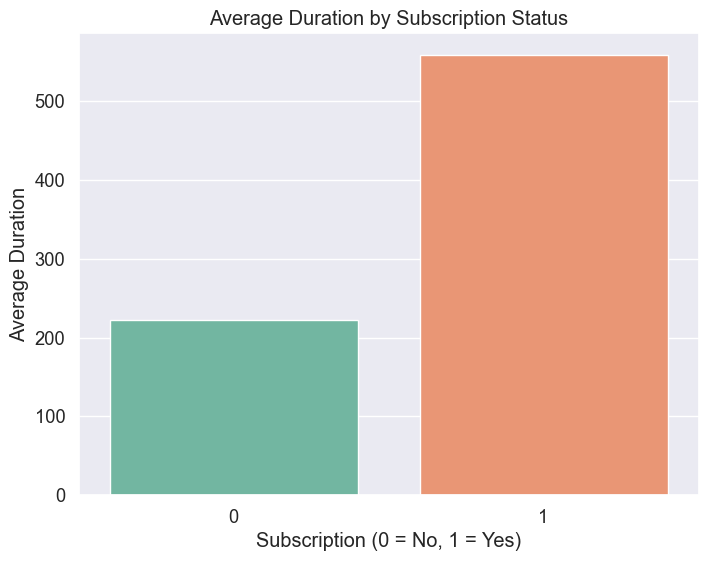

In [14]:
plt.figure(figsize=(8, 6))
sns.barplot(x='y', y='duration', data=bank_data_, palette='Set2', ci=None)
plt.title('Average Duration by Subscription Status')
plt.xlabel('Subscription (0 = No, 1 = Yes)')
plt.ylabel('Average Duration')
plt.show()


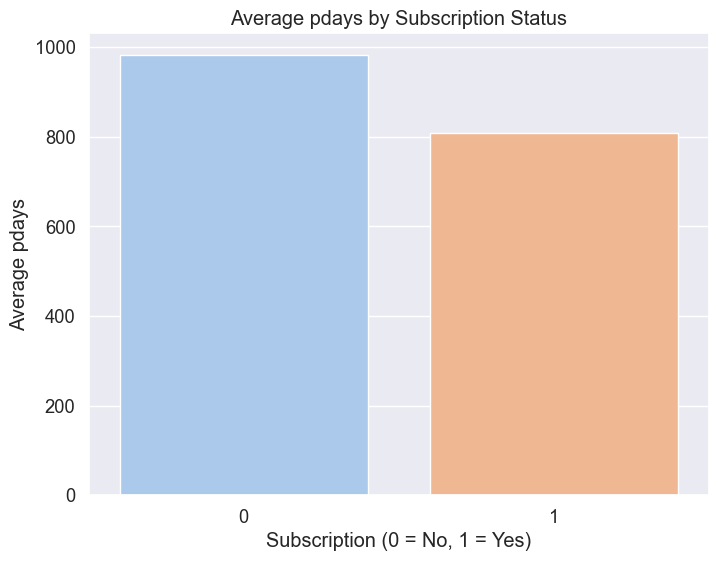

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(x='y', y='pdays', data=bank_data_, palette='pastel', ci=None)
plt.title('Average pdays by Subscription Status')
plt.xlabel('Subscription (0 = No, 1 = Yes)')
plt.ylabel('Average pdays')
plt.show()


### Split Data into Train and Test Data

In [16]:
X_data=bank_data_.drop(['y'],axis=1)
y_data=bank_data_['y']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 42)

# Displaying the size of each train and test data
print("X train Shape:",X_train.shape)
print("X test Shape:",X_test.shape)
print("y train Shape:",y_train.shape)
print("y test Shape:",y_test.shape)

X train Shape: (6588, 15)
X test Shape: (1648, 15)
y train Shape: (6588,)
y test Shape: (1648,)


In [18]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
7298,49,blue-collar,married,unknown,no,no,no,telephone,jun,thu,225.0,1,999,0,nonexistent
5694,28,services,single,high.school,no,yes,yes,cellular,may,fri,9.0,6,999,0,nonexistent
5892,49,admin.,single,university.degree,no,no,no,cellular,jul,tue,90.0,4,999,0,nonexistent
5457,50,entrepreneur,married,basic.9y,no,yes,no,cellular,nov,tue,241.0,2,999,1,failure
100,28,admin.,single,university.degree,no,no,no,cellular,oct,thu,72.0,2,999,0,nonexistent


In [19]:
y_train.head()

7298    0
5694    0
5892    0
5457    0
100     0
Name: y, dtype: int64

In [20]:
X_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
707,39,management,single,university.degree,no,yes,no,cellular,may,tue,103.0,1,999,1,failure
6028,41,self-employed,married,university.degree,no,yes,no,cellular,aug,mon,113.0,2,999,0,nonexistent
7669,48,blue-collar,married,basic.9y,no,no,yes,cellular,aug,mon,221.0,1,999,0,nonexistent
6957,31,admin.,divorced,high.school,no,no,yes,telephone,may,fri,100.0,4,999,0,nonexistent
6478,73,retired,married,basic.4y,unknown,no,no,cellular,aug,wed,76.0,1,999,0,nonexistent


In [21]:
y_test.head()

707     0
6028    0
7669    0
6957    0
6478    0
Name: y, dtype: int64

### Handling Missing Values

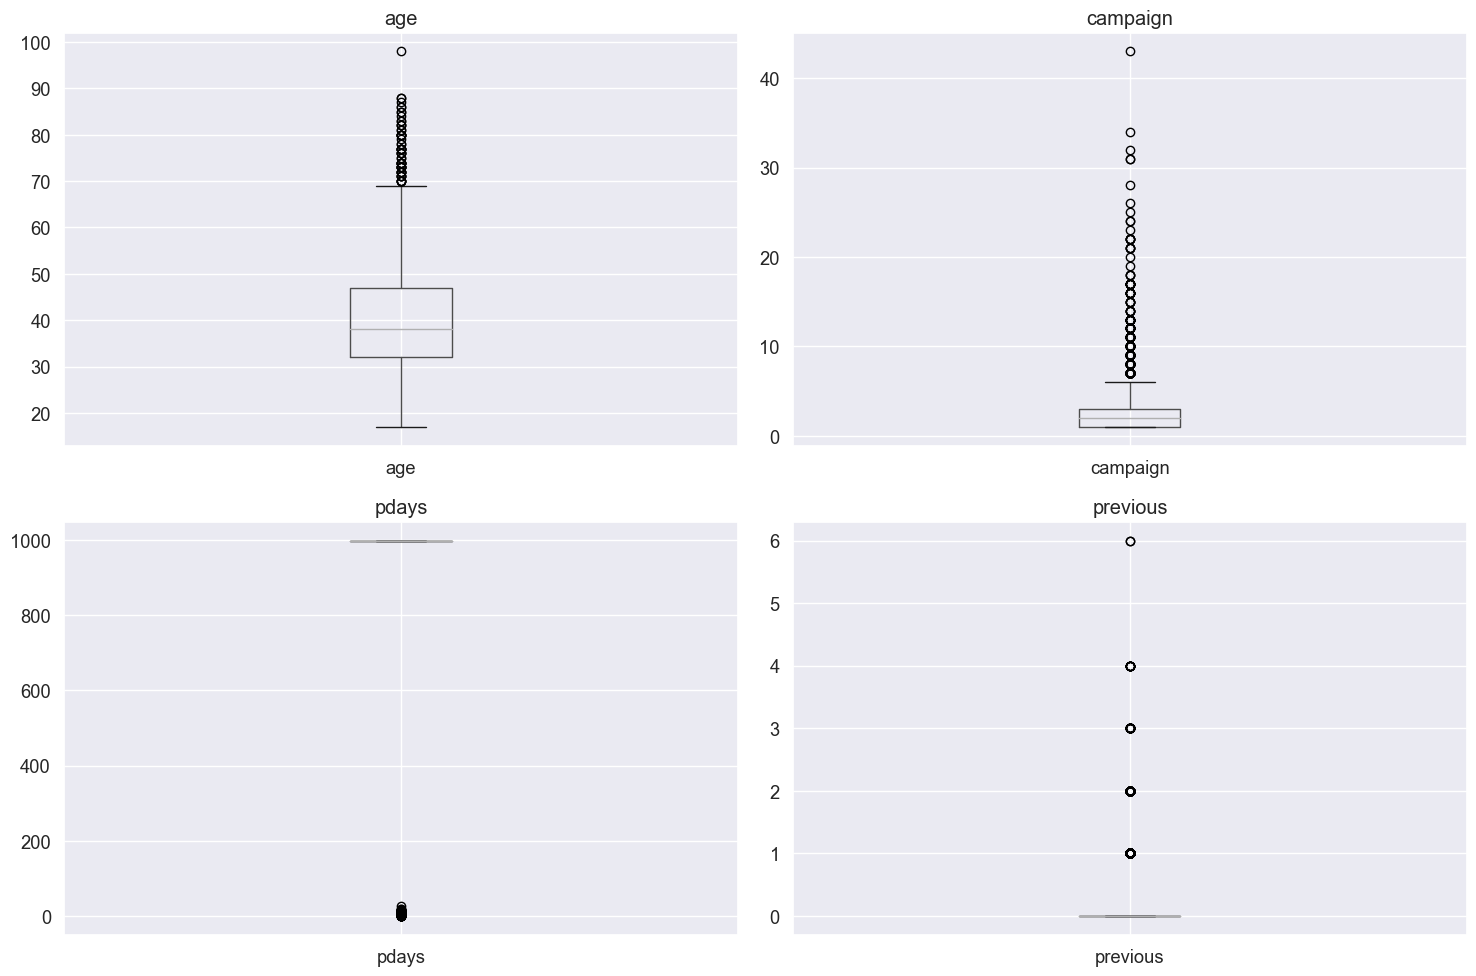

In [22]:
# Check Outliers untuk numeric_columns

# Identify categorical and numerical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numeric_columns = ['age', 'campaign', 'pdays', 'previous']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, column in enumerate(numeric_columns):
    row_index = i // 2
    col_index = i % 2
    X_train.boxplot(column=column, ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(column)

plt.tight_layout()
plt.show()

In [23]:
# Calculate outliers
outlier_counts = {}
total_counts = X_train.shape[0]
for column in numeric_columns:
    Q1 = X_train[column].quantile(0.25)
    Q3 = X_train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = X_train[(X_train[column] < lower_bound) | (X_train[column] > upper_bound)]
    outlier_counts[column] = {
        'count': outliers.shape[0],
        'percentage': (outliers.shape[0] / total_counts) * 100
    }

# Display outlier counts and percentages
for column, info in outlier_counts.items():
    print(f"Number of outliers in column {column}: {info['count']} ({info['percentage']:.2f}%)")

Number of outliers in column age: 63 (0.96%)
Number of outliers in column campaign: 382 (5.80%)
Number of outliers in column pdays: 238 (3.61%)
Number of outliers in column previous: 926 (14.06%)


In [24]:
X_train.isna().sum()

age             0
job             9
marital         0
education       0
default         0
housing         0
loan            0
contact         0
month           0
day_of_week     0
duration       13
campaign        0
pdays           0
previous        0
poutcome        0
dtype: int64

In [25]:
X_test.isna().sum()

age            0
job            1
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       2
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64

### Data Imputation for Handling Missing Values

The most frequently occurring value in the `job` column will be used as the imputation for the `job` column.

In [26]:
import statistics as sts
print(sts.mode(X_train['job']))

admin.


In [27]:
# For the categorical column `job`: fill with the mode.
mode_job = X_train['job'].mode()[0]
X_train['job'].fillna(mode_job, inplace=True)
X_test['job'].fillna(mode_job, inplace=True)

# For the numerical column `duration`: fill with the median.
median_duration = X_train['duration'].median()
X_train['duration'].fillna(median_duration, inplace=True)
X_test['duration'].fillna(median_duration, inplace=True)

# After Handling Missing Values
print("Missing values after handling:")
print(X_train.isnull().sum())


Missing values after handling:
age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64


# Performing Encoding on Categorical Features

In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6588 entries, 7298 to 7271
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          6588 non-null   int64  
 1   job          6588 non-null   object 
 2   marital      6588 non-null   object 
 3   education    6588 non-null   object 
 4   default      6588 non-null   object 
 5   housing      6588 non-null   object 
 6   loan         6588 non-null   object 
 7   contact      6588 non-null   object 
 8   month        6588 non-null   object 
 9   day_of_week  6588 non-null   object 
 10  duration     6588 non-null   float64
 11  campaign     6588 non-null   int64  
 12  pdays        6588 non-null   int64  
 13  previous     6588 non-null   int64  
 14  poutcome     6588 non-null   object 
dtypes: float64(1), int64(4), object(10)
memory usage: 823.5+ KB


In [29]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Automatically Identify Categorical Columns
categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()

# Specify Nominal and Ordinal Columns
nominal_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
ordinal_columns = ['month', 'day_of_week']

# Columns that are automatically identified belong to one of the above categories
nominal_columns = [col for col in categorical_columns if col in nominal_columns]
ordinal_columns = [col for col in categorical_columns if col in ordinal_columns]

# Create Mapping for Ordinal Columns
month_mapping = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
day_mapping = ['mon', 'tue', 'wed', 'thu', 'fri']

# One-Hot Encoding for Nominal Columns
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded_train = one_hot_encoder.fit_transform(X_train[nominal_columns])
one_hot_encoded_test = one_hot_encoder.transform(X_test[nominal_columns])

# Creating a DataFrame for One-Hot Encoding Results
one_hot_encoded_train_df = pd.DataFrame(one_hot_encoded_train, columns=one_hot_encoder.get_feature_names_out(nominal_columns), index=X_train.index)
one_hot_encoded_test_df = pd.DataFrame(one_hot_encoded_test, columns=one_hot_encoder.get_feature_names_out(nominal_columns), index=X_test.index)

# Ordinal Encoding for Ordinal Columns
ordinal_encoder = OrdinalEncoder(categories=[month_mapping, day_mapping])
ordinal_encoded_train = ordinal_encoder.fit_transform(X_train[ordinal_columns])
ordinal_encoded_test = ordinal_encoder.transform(X_test[ordinal_columns])

# Creating a DataFrame for Ordinal Encoding Results
ordinal_encoded_train_df = pd.DataFrame(ordinal_encoded_train, columns=ordinal_columns, index=X_train.index)
ordinal_encoded_test_df = pd.DataFrame(ordinal_encoded_test, columns=ordinal_columns, index=X_test.index)

# Merging All Encoded DataFrames with Numeric Columns
numerical_columns = [col for col in X_train.columns if col not in categorical_columns]
X_train = pd.concat([X_train[numerical_columns], one_hot_encoded_train_df, ordinal_encoded_train_df], axis=1)
X_test = pd.concat([X_test[numerical_columns], one_hot_encoded_test_df, ordinal_encoded_test_df], axis=1)


In [30]:
X_train.head()

,age,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,month,day_of_week
7298,49,225.0,1,999,0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,3.0
5694,28,9.0,6,999,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,4.0,4.0
5892,49,90.0,4,999,0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,6.0,1.0
5457,50,241.0,2,999,1,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,10.0,1.0
100,28,72.0,2,999,0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,9.0,3.0


In [31]:
X_test.head()

,age,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,month,day_of_week
707,39,103.0,1,999,1,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,1.0
6028,41,113.0,2,999,0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,7.0,0.0
7669,48,221.0,1,999,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,7.0,0.0
6957,31,100.0,4,999,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,4.0,4.0
6478,73,76.0,1,999,0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,7.0,2.0


In [32]:
X_train.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success', 'month',
       'day_of_week'],
      dtype='object')

In [33]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

label_encoding = LabelEncoder()

# Apply Label Encoding on y_train and y_test
y_train_encoded = label_encoding.fit_transform(y_train)
y_test_encoded = label_encoding.transform(y_test)

y_train = pd.Series(y_train_encoded)
y_test = pd.Series(y_test_encoded)

y_train.value_counts()

0    5841
1     747
Name: count, dtype: int64

In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6588 entries, 7298 to 7271
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            6588 non-null   int64  
 1   duration                       6588 non-null   float64
 2   campaign                       6588 non-null   int64  
 3   pdays                          6588 non-null   int64  
 4   previous                       6588 non-null   int64  
 5   job_admin.                     6588 non-null   float64
 6   job_blue-collar                6588 non-null   float64
 7   job_entrepreneur               6588 non-null   float64
 8   job_housemaid                  6588 non-null   float64
 9   job_management                 6588 non-null   float64
 10  job_retired                    6588 non-null   float64
 11  job_self-employed              6588 non-null   float64
 12  job_services                   6588 non-null   flo

### Modeling (Classification)

1. Classification using Support Vector Machine

In [35]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')


# Creating a Model for Scaling and Training SVM
Model_SVM_ = Pipeline([
    ('scaler', StandardScaler()),  # Standardizing Features with Standard Scaler
    ('svm', SVC(kernel='linear', decision_function_shape='ovr')) # OVR or One-vs-Rest
])

Model_SVM_.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(kernel='linear'))])

In [36]:
# Predicting with Test Data
y_pred = Model_SVM_.predict(X_test)

# Model Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.94      1461
           1       0.65      0.21      0.32       187

    accuracy                           0.90      1648
   macro avg       0.78      0.60      0.63      1648
weighted avg       0.88      0.90      0.87      1648


Confusion Matrix:
[[1440   21]
 [ 148   39]]


The SVM model performs very well in classifying class 0 (precision 91% and recall 99%). However, the performance for class 1 is unsatisfactory (precision 65% and recall 21%), as evidenced by the low F1-score for class 1 (0.32). This indicates that the model is better at identifying class 0 than class 1, which is also reflected in the confusion matrix, where more instances of class 1 are misclassified as class 0. Overall, the model's accuracy is 90%, but the imbalance in performance between class 0 and class 1 needs to be addressed.

2. Classification using Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

# Creating a model for scaling and training Logistic Regression
Model_LogReg = Pipeline([
    ('scaler', StandardScaler()),  # Standardizing features with Standard Scaler
    ('logreg', LogisticRegression())  # Logistic Regression Model
])

# Training the model
Model_LogReg.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('logreg', LogisticRegression())])

In [38]:
# Prediction with test data using Logistic Regression model
y_pred_logreg = Model_LogReg.predict(X_test)

# Logistic Regression Model Evaluation
print("Classification Report Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))

print("\nConfusion Matrix Logistic Regression:")
print(confusion_matrix(y_test, y_pred_logreg))

Classification Report Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1461
           1       0.72      0.35      0.47       187

    accuracy                           0.91      1648
   macro avg       0.82      0.67      0.71      1648
weighted avg       0.90      0.91      0.90      1648


Confusion Matrix Logistic Regression:
[[1435   26]
 [ 121   66]]


The Logistic Regression model performs very well in classifying class 0 (with 92% precision and 98% recall). However, the performance for class 1 is less satisfactory (72% precision and 35% recall), as indicated by the low f1-score for class 1 (0.47).

This suggests that the model is better at identifying class 0 than class 1, as seen in the confusion matrix where more class 1 instances are misclassified as class 0. Overall, the model accuracy is 91%, but the imbalance in performance between class 0 and class 1 needs attention.

### Comparison of SVM and Logistic Regression

This indicates that Logistic Regression is more effective in identifying potential customers who are likely to subscribe compared to SVM. While SVM has a high recall for class 0 (non-subscribers) at 99%, Logistic Regression also achieves a similarly high recall of 98% for the same class. Overall, Logistic Regression demonstrates better consistency across all evaluation metrics, including both macro and weighted averages, by minimizing false negatives and improving true positives in its confusion matrix.

### Save the best model, scaler, and trained encoder

In [39]:
import pickle

# Save the Logistic Regression model
with open('best_model.pkl', 'wb') as file:
    pickle.dump(Model_LogReg, file)

# Save the scaler for Logistic Regression
with open('logreg_scaler.pkl', 'wb') as file:
    pickle.dump(Model_LogReg['scaler'], file)

# Save One Hot Encoder
with open('onehot_encoder.pkl', 'wb') as file:
    pickle.dump(one_hot_encoder, file)

# Save Ordinal Encoder
with open('ordinal_encoder.pkl', 'wb') as file:
    pickle.dump(ordinal_encoder, file)

# Save Label Encoder
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoding, file)


### Creating prediction code that will be used for the deployment process

Code Prediction

In [40]:
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
import joblib
import pandas as pd
import logging
import numpy as np

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

app = FastAPI()

# Load the logistic regression model, scaler, encoder
try:
    with open('best_model.pkl', 'rb') as model_file:
        model_logreg = joblib.load(model_file)
    scaler_logreg = joblib.load('logreg_scaler.pkl')
    onehot_encoder = joblib.load('onehot_encoder.pkl')
    ordinal_encoder = joblib.load('ordinal_encoder.pkl')
    label_encoder = joblib.load('label_encoder.pkl')
    logger.info("Model and encoders loaded successfully")
except Exception as e:
    logger.error(f"Error loading models and encoders: {e}")
    raise HTTPException(status_code=500, detail="Error loading models and encoders")

class DataInput(BaseModel):
    age: int
    job: str  
    marital: str  
    education: str  
    default: str  
    housing: str  
    loan: str  
    contact: str  
    month: str  
    day_of_week: str  
    duration: float
    campaign: int
    pdays: int
    previous: int
    poutcome: str  

def preprocess_data(data: dict):
    data_df = pd.DataFrame([data])

    nominal_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
    ordinal_columns = ['month', 'day_of_week']
    numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous']

    # Handle unknown categories for nominal columns
    for col in nominal_columns:
        known_categories = set(onehot_encoder.categories_[nominal_columns.index(col)])
        data_df[col] = data_df[col].apply(lambda x: x if x in known_categories else 'unknown')

    # Handle unknown categories for ordinal columns
    for col in ordinal_columns:
        known_categories = set(ordinal_encoder.categories_[ordinal_columns.index(col)])
        data_df[col] = data_df[col].apply(lambda x: x if x in known_categories else 'unknown')

    # One-Hot Encoding for nominal columns
    one_hot_encoded_data = onehot_encoder.transform(data_df[nominal_columns])
    one_hot_encoded_df = pd.DataFrame(one_hot_encoded_data, columns=onehot_encoder.get_feature_names_out(nominal_columns), index=data_df.index)

    # Ordinal Encoding for ordinal columns
    ordinal_encoded_data = ordinal_encoder.transform(data_df[ordinal_columns])
    ordinal_encoded_df = pd.DataFrame(ordinal_encoded_data, columns=ordinal_columns, index=data_df.index)

    # Concatenate all data frames
    processed_data = pd.concat([data_df[numerical_columns], one_hot_encoded_df, ordinal_encoded_df], axis=1)

    return processed_data

@app.post("/predict/")
def predict(data: DataInput):
    try:
        data_dict = data.dict()
        preprocessed_data = preprocess_data(data_dict)
        scaled_data = scaler_logreg.transform(preprocessed_data)
        prediction = model_logreg.predict(scaled_data)

        # Assuming prediction is a single value array
        predicted_value = label_encoder.inverse_transform(prediction)[0]

        return {"prediction": str(predicted_value)}  # Ensure JSON serializability
    except Exception as e:
        logger.error(f"Error during prediction: {e}")
        raise HTTPException(status_code=500, detail=f"Error during prediction: {e}")

@app.get("/")
def read_root():
    return {"message": "Hello World"}


INFO:__main__:Model and encoders loaded successfully
